# In this notebook i mostly use regex to extract useful info from data. then i applied simple ML algo to complex one. Did Hyper- parameter tuning. Tested each result on validation set. Then optimize all things

In [1066]:
#Importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBRegressor

In [1067]:
train=pd.read_excel('Final_train.xlsx')

In [1068]:
test=pd.read_excel('Final_test.xlsx')

## Let's combine train and test set for data wrangling

In [1069]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [1070]:
test['Fees']=np.nan

In [1071]:
train.shape

(5961, 7)

In [1072]:
train=pd.concat([train,test],axis=0)

In [1073]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


## Since Data is messy so first we will clean data even before analysis

## Will use Regex for extracting perticular pattern from data

In [1074]:
#Extract experience numbers from data
train['experience']=train.Experience.str.extract('(\d+)')

In [1075]:
train.Place.value_counts()

Andheri West, Mumbai                 97
HSR Layout, Bangalore                97
Dwarka, Delhi                        93
Banjara Hills, Hyderabad             85
Mulund West, Mumbai                  81
Whitefield, Bangalore                70
Borivali West, Mumbai                68
Indiranagar, Bangalore               62
Pitampura, Delhi                     61
Malleswaram, Bangalore               61
Kandivali West, Mumbai               60
Malad West, Mumbai                   60
Vileparle West, Mumbai               57
Bannerghatta Road, Bangalore         57
Rohini, Delhi                        56
Jubilee Hills, Hyderabad             56
Powai, Mumbai                        53
Adyar, Chennai                       53
Shalimar Bagh, Delhi                 53
Kondapur, Hyderabad                  50
KPHB, Hyderabad                      50
Ghatkopar East, Mumbai               49
Andheri East, Mumbai                 49
Marathahalli, Bangalore              49
Secunderabad, Hyderabad              49


In [1076]:
#Ectracting Place from data
train['place']=train.Place.str.extract(',\s([a-zA-Z]*)$')

In [1077]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai


In [1078]:
train.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
77%      17
67%      17
71%      16
81%      15
79%      15
76%      13
73%      13
60%      11
75%       8
70%       8
74%       7
78%       7
69%       6
55%       5
56%       5
68%       5
64%       4
72%       3
57%       3
53%       2
65%       2
33%       2
63%       2
62%       2
36%       1
40%       1
52%       1
45%       1
58%       1
48%       1
47%       1
7%        1
Name: Rating, dtype: int64

In [1079]:
#Extracting Rating 
train['rating']=train.Rating.str.extract('(\d+)')

In [1080]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100


In [1081]:
# extracting usefull information from Qualification. As it contains various degree/diploma details. So lets search first
x=np.where(train.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)

C:\Users\Rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [1082]:
#Checking what else doctor had done other than above mentioned degree.s
for i in x:
    print(train.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [1083]:
# Making extra columns for each degree's
train['MBBS']=train.Qualification.str.extract('(MBBS)')
train['BDS']=train.Qualification.str.extract('(BDS)')
train['MD']=train.Qualification.str.extract('(MD)')
train['MS']=train.Qualification.str.extract('(MS)')
train['LCEH']=train.Qualification.str.extract('(LCEH)')
train['DDVL']=train.Qualification.str.extract('(DDVL)')
train['BAMS']=train.Qualification.str.extract('(BAMS)')
train['BSAM']=train.Qualification.str.extract('(BSAM)')
train['BHMS']=train.Qualification.str.extract('(BHMS)')
train['DHMS']=train.Qualification.str.extract('(DHMS)')
train['DNB']=train.Qualification.str.extract('(DNB)')
train['Get']=train.Qualification.str.extract('(Get inspired)')

In [1084]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'experience', 'place', 'rating', 'MBBS',
       'BDS', 'MD', 'MS', 'LCEH', 'DDVL', 'BAMS', 'BSAM', 'BHMS', 'DHMS',
       'DNB', 'Get'],
      dtype='object')

In [1085]:
#Replaceing NA in created dree's columns with 0
train.iloc[:,10:22]=train.iloc[:,10:22].fillna(0)

In [1086]:
#Replaceing each degree with 1
train.iloc[:,10:22]=train.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [1087]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating,...,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100,...,1,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98,...,1,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN,...,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN,...,0,1,0,0,1,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100,...,0,1,0,0,1,0,0,0,0,0


In [1088]:
#Choosing attributes which we will use for ML
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [1089]:
train=train[attributes]

In [1090]:
#Final dataframe with missing values
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [1091]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 17 columns):
Profile       7948 non-null object
Fees          5961 non-null float64
experience    7948 non-null object
place         7916 non-null object
rating        3556 non-null object
MBBS          7948 non-null int64
BDS           7948 non-null int64
MD            7948 non-null int64
MS            7948 non-null int64
LCEH          7948 non-null int64
DDVL          7948 non-null int64
BAMS          7948 non-null int64
BSAM          7948 non-null int64
BHMS          7948 non-null int64
DHMS          7948 non-null int64
DNB           7948 non-null int64
Get           7948 non-null object
dtypes: float64(1), int64(11), object(5)
memory usage: 1.1+ MB


## Checking Correlation target and feature columns

In [1092]:
corr_mat=train.corr()

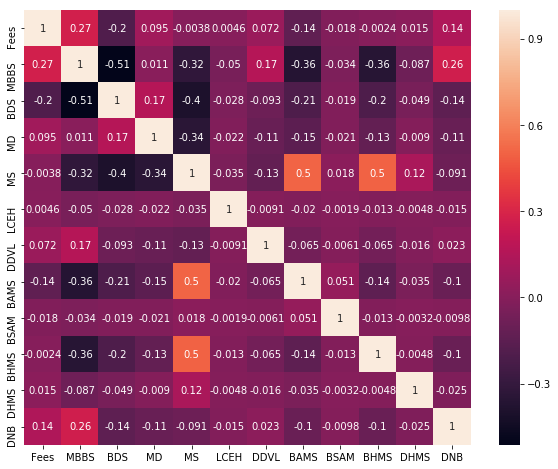

In [1093]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True)

In [1094]:
corr_mat['Fees'].sort_values(ascending=False)

Fees    1.000000
MBBS    0.271038
DNB     0.140918
MD      0.095383
DDVL    0.071667
DHMS    0.015443
LCEH    0.004635
BHMS   -0.002423
MS     -0.003847
BSAM   -0.018105
BAMS   -0.139891
BDS    -0.198635
Name: Fees, dtype: float64

## From above heatmap we can say that MBBS has good correlation with Target

In [1095]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [1096]:
train.Profile=train.Profile.astype('category')

## Lets put experience columns into groups

In [1097]:
train.experience.value_counts()

9     419
10    404
8     380
11    374
12    358
19    343
14    332
7     329
13    325
6     280
15    257
18    254
17    251
5     238
16    237
20    204
21    202
22    184
23    168
4     159
3     144
24    131
0     118
25    115
29    113
27    111
28    111
26    103
34     94
30     86
     ... 
33     73
36     73
39     70
37     69
35     65
40     61
42     52
43     50
44     48
41     48
46     38
45     28
49     22
47     20
48     17
51     14
50     12
54      7
52      6
59      5
53      4
56      4
55      3
57      2
65      2
61      1
64      1
66      1
58      1
60      1
Name: experience, Length: 64, dtype: int64

In [1098]:
train.experience=train.experience.astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023932613438>]],
      dtype=object)

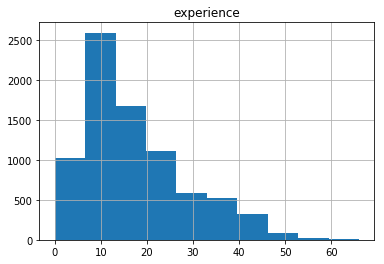

In [1099]:
train.hist('experience')

In [1100]:
y=train.groupby('experience')['Fees'].mean()
y

experience
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
6     299.931193
7     291.745833
8     307.092199
9     299.659443
10    308.095238
11    297.743056
12    312.544803
13    327.438017
14    342.111554
15    324.400000
16    318.279570
17    311.452514
18    336.304348
19    328.247012
20    313.333333
21    325.129870
22    345.782313
23    331.932773
24    303.917526
25    324.756098
26    344.225352
27    344.285714
28    354.512195
29    349.253731
30    333.823529
         ...    
35    339.038462
36    290.217391
37    303.454545
38    315.573770
39    283.508772
40    278.043478
41    246.666667
42    210.000000
43    232.000000
44    230.937500
45    170.476190
46    220.370370
47    295.454545
48    109.090909
49    246.428571
50    366.666667
51    254.545455
52    350.000000
53    166.666667
54    240.000000
55    133.333333
56    200.000000
57    100.000000
58    100.000000
59    200.000000
60    100.000000
61    100.000000
64 

In [1101]:
a=[1,2,3,4,5,6,7,8]
train['experience']=pd.cut(train.experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [1102]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [1103]:
train.isnull().sum()

Profile          0
Fees          1987
experience       1
place           32
rating        4392
MBBS             0
BDS              0
MD               0
MS               0
LCEH             0
DDVL             0
BAMS             0
BSAM             0
BHMS             0
DHMS             0
DNB              0
Get              0
dtype: int64

In [1104]:
train.rating.isnull().sum()

4392

## Since Rating have lot of missing values so dropping it

In [1105]:
del train['rating']

In [1106]:
# Filling missing values
train[train.experience.isnull()==True]

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
372,ENT Specialist,100.0,NaN,Chennai,1,0,0,0,0,0,0,0,0,0,0,0


In [1107]:
train.experience=train.experience.fillna(8)

In [1108]:
#Fill missing values
train.place=train.place.fillna('no_city')

## Seperating test and train data as it was intial

In [1109]:
test=train.iloc[5962:,:]

In [1110]:
train=train.iloc[:5961,:]

In [1111]:
train.shape

(5961, 16)

In [1112]:
train.head()

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,0,0,0,1,0,0,1,0,0,0,0,0


In [1113]:
train.place=train.place.astype('category')

In [1114]:
test.place=test.place.astype('category')

In [1115]:
# Hot encoding
train=pd.get_dummies(train)

In [1116]:
train_label=train.Fees
del train['Fees']

In [1117]:
test=pd.get_dummies(test)

In [1118]:
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired
0,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [1119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5960
Data columns (total 36 columns):
MBBS                        5961 non-null int64
BDS                         5961 non-null int64
MD                          5961 non-null int64
MS                          5961 non-null int64
LCEH                        5961 non-null int64
DDVL                        5961 non-null int64
BAMS                        5961 non-null int64
BSAM                        5961 non-null int64
BHMS                        5961 non-null int64
DHMS                        5961 non-null int64
DNB                         5961 non-null int64
Profile_Ayurveda            5961 non-null uint8
Profile_Dentist             5961 non-null uint8
Profile_Dermatologists      5961 non-null uint8
Profile_ENT Specialist      5961 non-null uint8
Profile_General Medicine    5961 non-null uint8
Profile_Homeopath           5961 non-null uint8
experience_1                5961 non-null uint8
experience_2                5

In [1120]:
del test['Fees']

In [1121]:
train.shape

(5961, 36)

In [1122]:
test.shape

(1986, 36)

In [1123]:
train['Fees']=train_label
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired,Fees
0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,100.0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,350.0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,300.0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0


In [1124]:
# Split data into train and valid
df=train
df_label=df['Fees']
from sklearn.model_selection import train_test_split
train , val = train_test_split(train,test_size=0.20,random_state=67)

In [1125]:
train.shape

(4768, 37)

In [1126]:
train_label=train.Fees
val_label=val.Fees
del train['Fees']
del val['Fees']

In [1127]:
del df['Fees']

# Now we are ready to apply algorithms. We will use cross validation and other than that we are going to check with RMSL Error

In [1128]:
# defined a function to calculate RMSLE 

def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [1129]:
from sklearn.model_selection import cross_val_score

In [1130]:
#Cross Vald function
def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

In [1131]:
from sklearn.linear_model import LinearRegression

In [1132]:
lr=LinearRegression()

In [1133]:
score_lr=func(lr,df,df_label,10)

In [1134]:
score_lr.mean()

172.26868641530518

In [1135]:
lr.fit(df,df_label)
total=lr.predict(val)

In [1136]:
rmsle_lr,std_lr=rmsle(total,val_label)
rmsle_lr,std_lr

(0.28506732245833877, 0.0)

# SGD

In [1137]:
from sklearn.linear_model import SGDRegressor

In [1138]:
sg=SGDRegressor(tol=1e-30)

In [1139]:
score_sg=func(sg,df,df_label,10)

In [1140]:
score_sg.mean()

171.78246711319642

In [1141]:
sg.fit(train,train_label)
score=sg.predict(val)
rmsle_sg,std_sg=rmsle(score,val_label)
rmsle_sg,std_sg

(0.2879147636054715, 0.0)

# DTR

In [1142]:
from sklearn.tree import DecisionTreeRegressor

In [1143]:
dtr=DecisionTreeRegressor()

In [1144]:
score_dtr=func(dtr,df,df_label,10)

In [1145]:
score_dtr.mean()

186.8393227598765

In [1146]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

(0.29515250953028355, 0.0)

# SVM

In [1147]:
from sklearn.svm import SVR

In [1148]:
svm=SVR(kernel='rbf',gamma=0.05,C=70)

In [1149]:
score_svm=func(svm,df,df_label,10)

In [1150]:
score_svm.mean()

174.16322708257468

In [1151]:
svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

(0.27778331767107856, 0.0)

# KNN

In [1152]:
from sklearn.neighbors import KNeighborsRegressor
score_knn=[]
for k in range(30,70):
    knn=KNeighborsRegressor(k,algorithm='auto')
    score=func(knn,df,df_label,10)
    score=score.mean()
    score_knn.append(score)

In [1153]:
pd.Series(score_knn,index=range(30,70)).sort_values()

40    173.128570
35    173.154464
64    173.196973
57    173.213214
41    173.217343
44    173.224976
31    173.238137
62    173.261768
34    173.262534
67    173.262594
68    173.265582
45    173.268235
42    173.281058
66    173.296873
63    173.309818
65    173.334656
61    173.341759
48    173.344998
69    173.350409
39    173.350448
47    173.351852
46    173.352699
37    173.366093
33    173.369480
43    173.375336
56    173.389448
55    173.442079
53    173.446375
52    173.449271
30    173.450179
60    173.465456
32    173.468621
50    173.470103
36    173.496862
38    173.501397
59    173.532083
54    173.575728
58    173.602229
49    173.606446
51    173.633971
dtype: float64

In [1154]:
knn=KNeighborsRegressor(40,algorithm='auto')
score=func(knn,train,train_label,10)
score_knn=score.mean()

In [1155]:
score_knn

173.1285696228666

In [1156]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

(0.28755989042429037, 0.0)

# RandomForest

In [1157]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=17)
score=func(rf,df,df_label,10)
score_rf=score.mean()
score_rf

C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

181.16157093297298

In [1158]:
rf.fit(train,train_label)
score=rf.predict(val)
rmsle_rf,std_rf=rmsle(score,val_label)
rmsle_rf,std_rf

C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.28877513478379147, 0.0)

# extra tree

In [1159]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor(random_state=13)
score=func(etr,df,df_label,10)
score_etr=score.mean()
score_etr

186.93979353238268

In [1160]:
etr.fit(train,train_label)
score=etr.predict(val)
rmsle_etr,std_etr=rmsle(score,val_label)
rmsle_etr,std_etr

(0.29399792763025145, 0.0)

# Bagging

In [1161]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(dtr,bootstrap=True)
score=func(br,df,df_label,10)
score_br=score.mean()
score_br

181.332566818187

In [1162]:
br.fit(train,train_label)
score=br.predict(val)
rmsle_br,std_br=rmsle(score,val_label)
rmsle_br,std_br

(0.28827910783158456, 0.0)

# ADA

In [1163]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=200)
score=func(ada,df,df_label,10)
score_ada=score.mean()
score_ada

180.09190040788476

In [1164]:
ada.fit(train,train_label)
score=ada.predict(val)
rmsle_ada,std_ada=rmsle(score,val_label)
rmsle_ada,std_ada

(0.3119071318873949, 0.0)

# Gradient

In [1165]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
score=func(gbr,df,df_label,10)
score_gb=score.mean()
score_gb

171.2365107601824

In [1166]:
gbr.fit(train,train_label)
score=gbr.predict(val)
rmsle_gb,std_gb=rmsle(score,val_label)
rmsle_gb,std_gb

(0.2822712309638584, 0.0)

# XG

In [1167]:
import xgboost
xgb=xgboost.XGBRegressor()
score=func(xgb,df,df_label,10)
score_xg=score.mean()
score_xg

171.01340814451163

In [1168]:
xgb.fit(train,train_label)
score=xgb.predict(val)
rmsle_xg,std_xg=rmsle(score,val_label)
rmsle_xg,std_xg

(0.28218685301943275, 0.0)

In [1169]:
table=pd.DataFrame([rmsle_lr,rmsle_sg,rmsle_dtr,rmsle_svm,rmsle_rf,rmsle_ada,rmsle_etr,rmsle_gb,rmsle_knn,rmsle_xg,rmsle_br],
            index=['LinearReg','SGD','Tree','SVM','Random','Ada','Extra','Gradient','knn','xgb','bagging'])

In [1170]:
table.sort_values(by=0)

,0
SVM,0.277783
xgb,0.282187
Gradient,0.282271
LinearReg,0.285067
knn,0.287560
SGD,0.287915
bagging,0.288279
Random,0.288775
Extra,0.293998
Tree,0.295153


In [1171]:
imp=pd.DataFrame(rf.feature_importances_ ,index=train.columns)

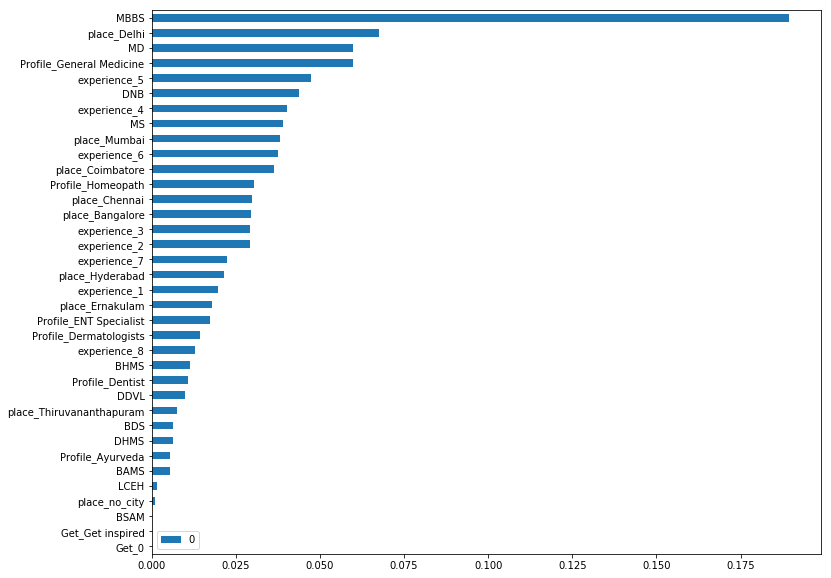

In [1172]:
imp.sort_values(by=0).plot.barh(figsize=(12,10))

In [1173]:
train.shape , test.shape , val.shape

((4768, 36), (1986, 36), (1193, 36))

# Random Sarch on XG

In [1174]:
from sklearn.model_selection import RandomizedSearchCV

In [1175]:
param = {'max_depth':[1,3,5,7,10,13], 'min_child_weight': [0.5,1,3,5,6],'booster':['gbtree','gblinear']}
xgb=XGBRegressor(n_estimators=100 , eta = 0.1 , gamma =0 ,
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=13)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)

In [1176]:
rs.fit(train,train_label)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=13, silent=True, subsample=0.8),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 3, 5, 7, 10, 13], 'min_child_weight': [0.5, 1, 3, 5, 6], 'booster': ['gbtree', 'gblinear']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [1177]:
rs.best_params_

{'min_child_weight': 5, 'max_depth': 3, 'booster': 'gbtree'}

In [1178]:
#Other parameters
param = {'gamma':[i/10.0 for i in range(0,11)]}
xgb=XGBRegressor(n_estimators=100 , eta = 0.1 ,max_depth=3,min_child_weight =5,booster='gbtree',
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=13)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)
rs.fit(train,train_label)
rs.best_params_

{'gamma': 0.5}

In [1179]:
param = {'n_estimators':[500,1000,2000]}
xgb=XGBRegressor(gamma =0.5 ,max_depth=3,min_child_weight =5,eta=0.1,booster='gbtree',
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=23)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)
rs.fit(train,train_label)
rs.best_params_

C:\Users\Rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 500}

# Gradient Boost Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV

param={'max_depth':[3,5,7,9,11],'min_samples_leaf':[3,5,9,19],
       'min_samples_split':[15,25,40,55],'max_features':[3,5,10,15,25],
       'max_leaf_nodes':[3,5,7,9,11,13,17],
      'subsample':[0.7,0.9],'verbose':[0,1,2,3],'subsample':[0.7,0.9]}

rf=RandomizedSearchCV(GradientBoostingRegressor(),param,cv=5)

rf.fit(train,train_label)

rf.best_params_

rf.best_estimator_

rf=rf.best_estimator_

param={'learning_rate':[0.1,0.01,0.001],'n_estimators':[500,1000,2000]}

gb=rf
rf=RandomizedSearchCV(rf,param,cv=5)

rf.fit(train,train_label)

rf.best_params_

rf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=5,
             max_leaf_nodes=9, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=55, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.9, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

## Now using XGBoost model for prediction

In [1180]:
xgb=XGBRegressor(gamma =0.5 ,max_depth=3,min_child_weight =5,eta=0.005,booster='gbtree',
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=43,n_estimatos=500)

In [1181]:
xgb.fit(df,df_label)
score=xgb.predict(test)

In [1182]:
df=pd.DataFrame(score,columns=['Fees'])

In [1183]:
df.to_csv('sub.csv',index=False)

# Will update more as i learn more